## 🔗 1. Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


## 📊 2. Data Overview

In [2]:
df = pd.read_csv('/kaggle/input/airline-dataset/Airline Dataset.csv')
df.head()


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [3]:
df.describe()
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

## 🛠️ 3. Feature Engineering

In [4]:
df["date_added"] = pd.to_datetime(df["Departure Date"], format="%m/%d/%Y")
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,date_added
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time,2022-06-28
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time,2022-12-26
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time,2022-01-18
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed,2022-09-16
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time,2022-02-25


In [5]:
df['Month'] = df['date_added'].dt.month.astype(int)
df['Day'] = df['date_added'].dt.day.astype(int)
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,date_added,Month,Day
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time,2022-06-28,6,28
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time,2022-12-26,12,26
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time,2022-01-18,1,18
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed,2022-09-16,9,16
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time,2022-02-25,2,25


In [6]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"
    
df['season'] = df['Month'].apply(get_season)
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,date_added,Month,Day,season
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time,2022-06-28,6,28,Summer
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time,2022-12-26,12,26,Winter
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time,2022-01-18,1,18,Winter
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed,2022-09-16,9,16,Autumn
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time,2022-02-25,2,25,Winter


## 🔍 4. Exploratory Data Analysis (EDA)

### 🏢 Top Airports

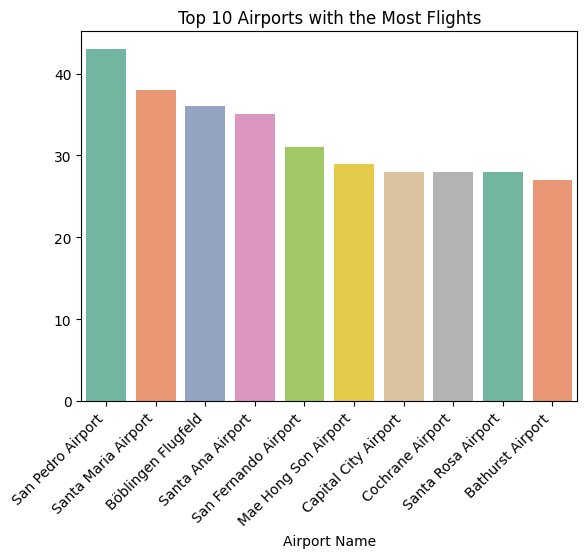

In [7]:
top_airport = df["Airport Name"].value_counts().head(10)
sns.barplot(x=top_airport.index, y=top_airport.values,palette='Set2')
plt.title("Top 10 Airports with the Most Flights")
plt.xticks(rotation=45, ha='right') 
plt.show()

### 🥧 Flight Status Distribution

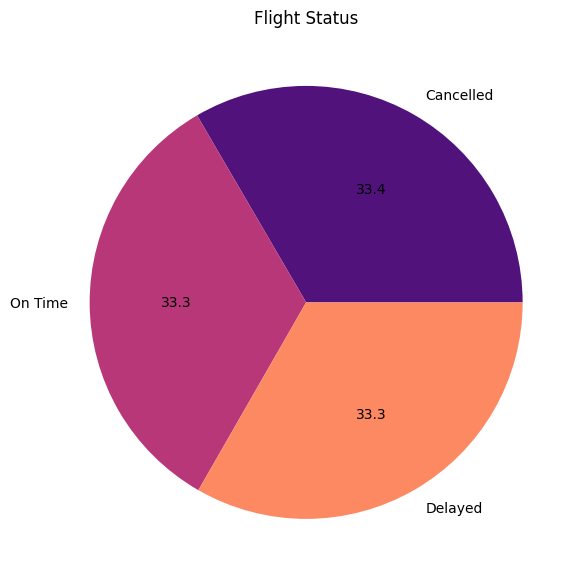

In [8]:
df_counts = df["Flight Status"].value_counts()
colors = sns.color_palette("magma",n_colors=3)

plt.figure(figsize=(6,6))
plt.pie(df_counts.values, labels=df_counts.index,colors=colors, autopct='%1.1f')
plt.title("Flight Status")
plt.tight_layout()
plt.show()

### 👥 Gender-Based Trends Over Months

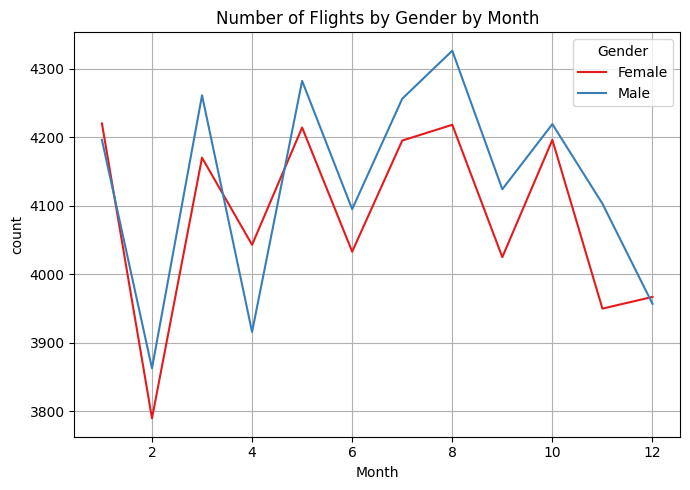

In [9]:
monthly_counts = df.groupby(['Month', 'Gender']).size().reset_index(name='count')

plt.figure(figsize=(7,5))
sns.lineplot(data=monthly_counts, x='Month', y='count', hue='Gender',palette='Set1')
plt.title("Number of Flights by Gender by Month")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🌤️ Seasonal Flight Trends

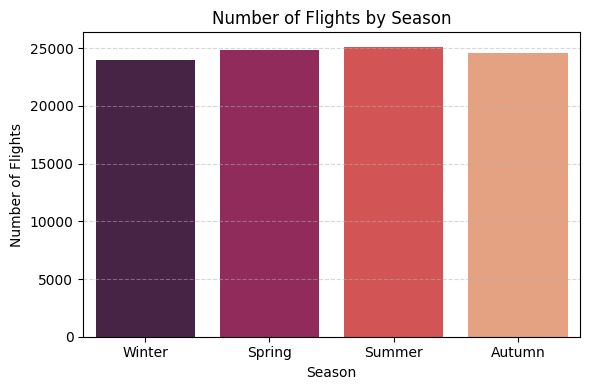

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='season', data=df, order=["Winter", "Spring", "Summer", "Autumn"], palette='rocket')
plt.title("Number of Flights by Season")
plt.xlabel("Season")
plt.ylabel("Number of Flights")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🌍 Continent-Wise Flight Counts

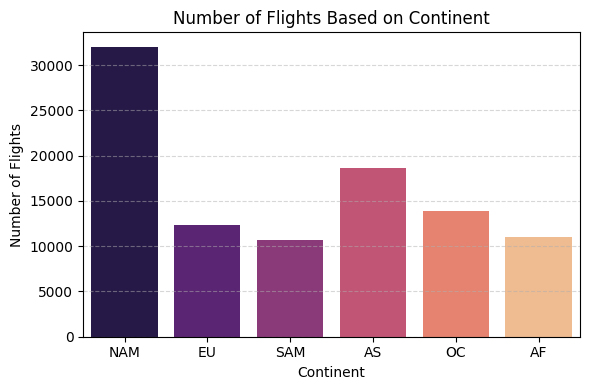

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Airport Continent', data=df,palette='magma')
plt.title("Number of Flights Based on Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Flights")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔥 Continent vs Flight Status Heatmap

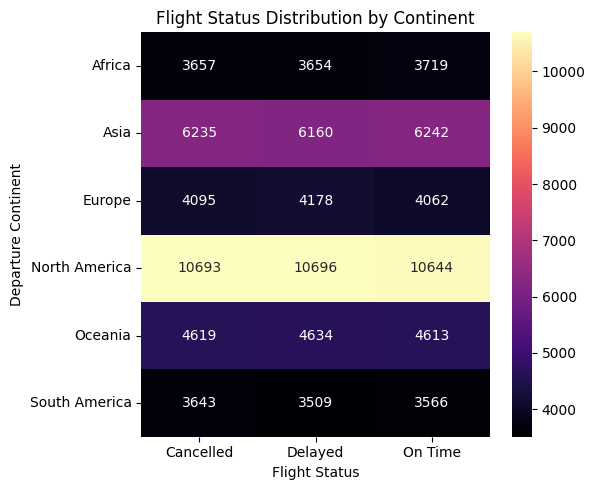

In [12]:
pivot = df.pivot_table(index='Continents', columns='Flight Status', aggfunc='size')

plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="magma")
plt.title("Flight Status Distribution by Continent")
plt.xlabel("Flight Status")
plt.ylabel("Departure Continent")
plt.tight_layout()
plt.show()